In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#url = "https://github.com/k5yi/econ2005/blob/master/datasets/titanic_processed.csv"
#s= requests.get(url).content
#c=pd.read_csv(s)
#c=pd.read_csv(io.StringIO(s.decode('utf-8')))
titanic = pd.read_csv('DataSet/titanic_processed.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1305 non-null   int64  
 1   pclass    1305 non-null   int64  
 2   sex       1305 non-null   object 
 3   age       1305 non-null   float64
 4   sibsp     1305 non-null   int64  
 5   parch     1305 non-null   int64  
 6   fare      1305 non-null   float64
 7   embarked  1305 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.7+ KB


In [3]:
y = titanic.pop("survived") 
# pop을 쓰면 해당 column을 빼면서 입력.
y

0       1
1       1
2       0
3       0
4       0
       ..
1300    0
1301    0
1302    0
1303    0
1304    0
Name: survived, Length: 1305, dtype: int64

In [4]:
x = titanic
x

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...
1300,3,female,14.5000,1,0,14.4542,C
1301,3,female,22.0000,1,0,14.4542,C
1302,3,male,26.5000,0,0,7.2250,C
1303,3,male,27.0000,0,0,7.2250,C


# 표본분포확인과정

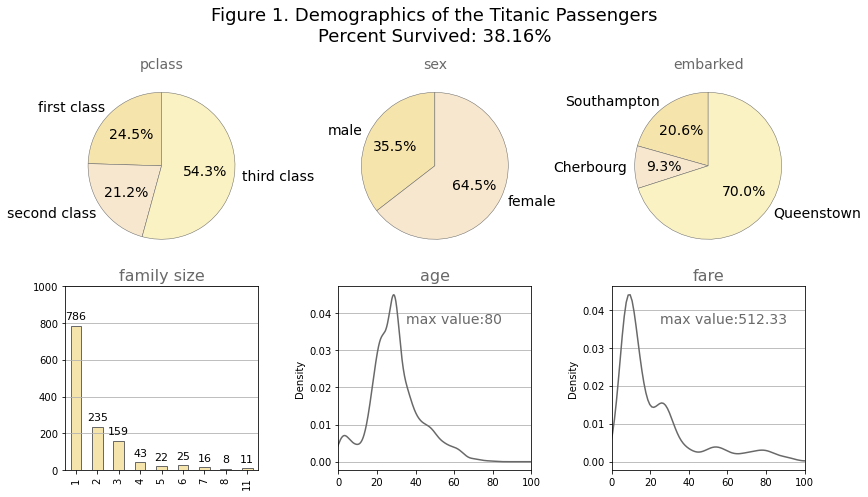

In [5]:
labels = [["first class", "second class", "third class"],
          ["male","female"],
          ["Southampton","Cherbourg","Queenstown"]]
colors = ["#F6E4AD","#f7e7ce","#FAF2C3"]

fig, ax = plt.subplots(2,3, figsize = (12,7))
ax = ax.flatten()

for i, var in enumerate(['pclass', 'sex', 'embarked']):
    unique, counts = np.unique(x.loc[:,var], return_counts=True)
    ax[i].pie(counts, colors = colors, labels=labels[i],autopct = '%.1f%%',
             startangle = 90, textprops = {'fontsize':14},
             wedgeprops = {"edgecolor":"dimgray",'linewidth':.5})
    ax[i].set_title(var,fontsize=14,color = 'dimgray')
    

family = (x.sibsp + x.parch + 1).value_counts(normalize=False).sort_index()
family.plot(kind="bar",ax=ax[3], color = "#F6E4AD", edgecolor="dimgray")
ax[3].set_title("family size", fontsize=16, color="dimgray")
ax[3].grid(axis="y")
ax[3].set_ylim([0,1000])

for c in ax[3].containers:
    ax[3].bar_label(c,fmt='%.0f',padding=4, fontsize=11)
    
x.age.plot(kind="kde",ax=ax[-2], color="dimgrey",bw_method=0.2)
ax[-2].set_xlim(0,100)
ax[-2].text(0.35, 0.8, f"max value:{x.age.max():.0f}",
           fontsize=14,color="dimgray",transform=ax[-2].transAxes)

ax[-2].grid(axis="y")
ax[-2].set_title("age",fontsize=16,color="dimgray")

x.fare.plot(kind="kde", ax=ax[-1], color="dimgrey", bw_method=0.08)
ax[-1].set_xlim(0,100)
ax[-1].text(0.25, 0.8, f"max value:{x.fare.max():.2f}",
           fontsize=14, color="dimgray", transform=ax[-1].transAxes)
ax[-1].grid(axis="y")
ax[-1].set_title("fare",fontsize=16,color="dimgray")

plt.suptitle(f"Figure 1. Demographics of the Titanic Passengers\n\
Percent Survived: {100*y.astype(int).sum()/len(y):.2f}%",fontsize=18)
plt.tight_layout();

# 자료정리

### Dummy Variables

In [6]:
num_vars = ['age','sibsp','parch','fare']
cat_vars = ['pclass','sex','embarked']

x = pd.get_dummies(x, columns=cat_vars, drop_first=True
                  , prefix = cat_vars)
print(x)

          age  sibsp  parch      fare  pclass_2  pclass_3  sex_male  \
0     29.0000      0      0  211.3375         0         0         0   
1      0.9167      1      2  151.5500         0         0         1   
2      2.0000      1      2  151.5500         0         0         0   
3     30.0000      1      2  151.5500         0         0         1   
4     25.0000      1      2  151.5500         0         0         0   
...       ...    ...    ...       ...       ...       ...       ...   
1300  14.5000      1      0   14.4542         0         1         0   
1301  22.0000      1      0   14.4542         0         1         0   
1302  26.5000      0      0    7.2250         0         1         1   
1303  27.0000      0      0    7.2250         0         1         1   
1304  29.0000      0      0    7.8750         0         1         1   

      embarked_Q  embarked_S  
0              0           1  
1              0           1  
2              0           1  
3              0       

### 로그변환

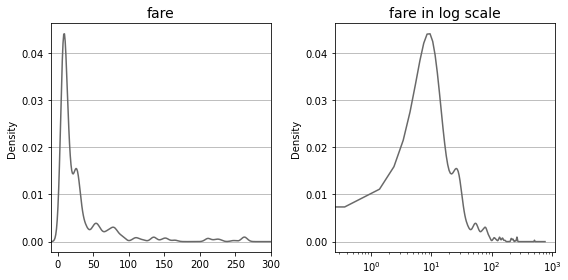

In [7]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

x.fare.plot(kind="kde",ax=ax[0],color="dimgrey",bw_method=0.08)
ax[0].set_xlim(-10,300)
ax[0].grid(axis="y")
ax[0].set_title("fare",fontsize=14)

x.fare.plot(kind="kde",ax=ax[1],color="dimgrey",bw_method=0.08)
ax[1].set_xscale('log')
ax[1].grid(axis="y")
ax[1].set_title("fare in log scale", fontsize=14)

fig.tight_layout()

### 다중공선성

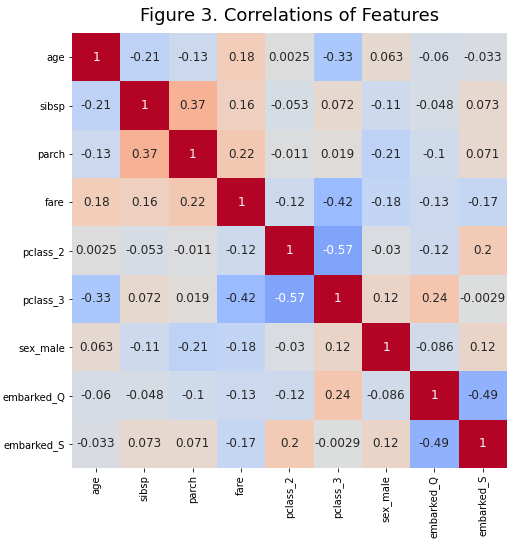

In [8]:
import seaborn as sns

plt.figure(figsize=(8,8))
plt.yticks(rotation=0)
sns.set(font_scale=1)
heatmap = sns.heatmap(x.corr(),vmin=-1,vmax=1,annot=True,square=True,cmap='coolwarm',cbar=False)
heatmap.set_title('Figure 3. Correlations of Features', fontdict={'fontsize':18},pad=12)
sns.reset_orig()

In [11]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(features):
    features=sm.add_constant(features)
    features.dropna(inplace=True)
    
    vif = pd.DataFrame([variance_inflation_factor(features.values, i)
                       for i in range(features.shape[1])],columns=['VIF'])
    vif.index = features.columns
    return vif

x_log = x.copy()
x_log['log_fare'] = np.log(x['fare'])
#com log scale

x_log.drop('fare',axis=1,inplace=True)
x_log = x_log[['age','sibsp','parch','log_fare','pclass_2','pclass_3','sex_male',
               'embarked_Q','embarked_S']]

VIF = pd.concat([vif(x),vif(x_log)],axis=1)
VIF = VIF.loc[['const','age','sibsp','parch','fare','log_fare',
              'pclass_2','pclass_3','sex_male',
              'embarked_Q','embarked_S'],:]
VIF.columns = ['vif fare','vif log_fare']
VIF


,vif fare,vif log_fare
const,24.007705,110.969112
age,1.258118,1.259711
sibsp,1.235813,1.544288
parch,1.279155,1.472668
fare,1.811195,NaN
log_fare,NaN,4.776524
pclass_2,2.141427,2.991318
pclass_3,2.876941,6.213554
sex_male,1.112237,1.124350
embarked_Q,1.499836,1.507135


# Classification

In [12]:
from sklearn.model_selection import train_test_split

#Split data
X= sm.add_constant(x_log)# Add Constant
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [ ]:
import statsmodels.api as sm

ols = sm.OLS(y_train,X_train).fit()

y_fit = np.clip(ols.fittedvalues, 1e-9,1-1e-9)
w= np.sqrt(y_fit*(1-y_fit))

wls = sm.WLS(y_train,X_train, weights=1/w).fit()
#in WLS ciiping error is included
logit = sm.Logit(y_train,X_train).fit()
# Logistic regression is more robust than OLS inspect of threshold

In [ ]:
from statsmodels.iolib.summary2 import summary_col

ols_comp = [ols, wls, logit]
model_names =['OLS','WLS','Logistic']

regressions = summary_col(results = ols_comp,
                         model_names = model_names,
                          regressor_order = ['age','sibsp','parch','log_fare','pclass_2','pclass_3',
                                            'sex_male','embarked_Q','embarked_S'],
                          float_format='%0.3f',stars=True)

regressions.add_title('Classification Models of Titanic Data')
print(regressions)

In [ ]:
logit.get_margeff(at='mean').summary()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1,3,figsize=(10,4),sharey=True)

plt.rcParams.update({'font.size':14})

for i,est in enumerate([ols,wls,logit]):
    y_fit = est.predict(X_train) >.5
    ConfusionMatrixDisplay.from_predictions(y_train, y_fit, ax=ax[i],
                                           display_labels=['Died','Survived'],
                                           cmap = plt.cm.Oranges,
                                           colorbar=False)
    acc = sum(y_train == y_fit.astype(int))/len(y_fit)
    
    ax[i].set_title(f'{model_names[i]},acc={acc:.1%}',fontsize=14)
    
fig.suptitle('Training Data, Threshold=0.5',fontsize=16)
fig.tight_layout()

In [1]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1,3,figsize=(10,4),sharey=True)

plt.rcParams.update({'font.size':14})

for i,est in enumerate([ols,wls,logit]):
    y_fit = est.predict(X_train) >.57
    ConfusionMatrixDisplay.from_predictions(y_train, y_fit, ax=ax[i],
                                           display_labels=['Died','Survived'],
                                           cmap = plt.cm.Oranges,
                                           colorbar=False)
    acc = sum(y_train == y_fit.astype(int))/len(y_fit)
    
    ax[i].set_title(f'{model_names[i]},acc={acc:.1%}',fontsize=14)
    
fig.suptitle('Training Data, Threshold=0.5',fontsize=16)
fig.tight_layout()

NameError: name 'plt' is not defined

### Test

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1,3,figsize=(10,4),sharey=True)

#plt.rcParams.update({'font.size':14})

for i,est in enumerate([ols,wls,logit]):
    y_pred = est.predict(X_train) >.5
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[i],
                                           display_labels=['Died','Survived'],
                                           cmap = plt.cm.Oranges,
                                           colorbar=False)
    acc = sum(y_train == y_fit.astype(int))/len(y_pred)
    
    ax[i].set_title(f'{model_names[i]},acc={acc:.1%}',fontsize=14)
    
fig.suptitle('Training Data, Threshold=0.5',fontsize=16)
fig.tight_layout()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1,3,figsize=(10,4),sharey=True)

#plt.rcParams.update({'font.size':14})

for i,est in enumerate([ols,wls,logit]):
    y_pred = est.predict(X_train) >.57
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[i],
                                           display_labels=['Died','Survived'],
                                           cmap = plt.cm.Oranges,
                                           colorbar=False)
    acc = sum(y_train == y_fit.astype(int))/len(y_pred)
    
    ax[i].set_title(f'{model_names[i]},acc={acc:.1%}',fontsize=14)
    
fig.suptitle('Training Data, Threshold=0.5',fontsize=16)
fig.tight_layout()

In [ ]:
for c in ax[3].containers:
    ax[3].bar_label(c,fmt='%.0f',padding=4, fontsize=11)
    
x.age.plot(kind="kde",ax=ax[-2], color="dimgrey",bw_method=0.2)
ax[-2].set_xlim(0,100)
ax[-2].text(0.35, 0.8, f"max value:{x.age.max():.0f}",
           fontsize=14,color="dimgray",transform=ax[-2].transAxes)

ax[-2].grid(axis="y")
ax[-2].set_title("age",fontsize=16,color="dimgray")

x.fare.plot(kind="kde", ax=ax[-1], color="dimgrey", bw_method=0.08)
ax[-1].set_xlim(0,100)
ax[-1].text(0.25, 0.8, f"max value:{x.fare.max():.2f}",
           fontsize=14, color="dimgray", transform=ax[-1].transAxes)
ax[-1].grid(axis="y")
ax[-1].set_title("fare",fontsize=16,color="dimgray")

plt.suptitle(f"Figure 1. Demographics of the Titanic Passengers\n\
Percent Survived: {100*y.astype(int).sum()/len(y):.2f}%",fontsize=18)
plt.tight_layout();

## 자료정리

In [ ]:
df["sex"] = df["sex"].map({'male':0,'female':1})

In [ ]:
# null 데이터유무를 확인
df.isnull().sum()

In [ ]:
#좌석에 대한 정보 확인. 1:First Class, 2:Business Class, 3: Else
df['pclass']

In [ ]:
#Dummy Data 생성
dummies = pd.get_dummies(df['pclass'])
dummies.rename(columns = {1:'FirstClass',2:'SecondClass',3:'Etc'},inplace= True)

del df['pclass'] # Delete Original Data
df = pd.concat([df,dummies],axis=1,join='inner')
df

In [ ]:
#features = df[['age','']]

In [ ]:
#연속형 데이터
df.iloc[:,:16].hist(figsize=(30,20))
plt.show()

In [ ]:
#범주형데이터


In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=[12,8])
plt.show()

1. 회귀 선이 (0,0)을 지나야 할 때, 입력과 출력 모두 로그 변환이 요구된다.
2. 만약에 변수가 상대적인 스케일에 있을 때, 또는 퍼센트로 된 스케일이 있다면 로그 변환이 요구 된다.
3. 변수들이 왼쪽 끝에서 0이고, 오른쪽에서는 이론적으로 임의의 큰 값을 상대적인 스케일에서 가질 때
4. 만약에 변수에 대한 Marginal분포가 우리가 히스토그램으로부터 관찰할 수 있듯이, 명백하게 오른쪽으로 기울어져 있다면, 이것은 종종 상대적인 스케일에서의 양수의 변수의 케이스가 되고, 따라서, 로그 변환이 요구 된다.

In [ ]:
#로그 변환
df_adjusted = df
df_adjusted['logFare'] = np.log(df['fare'])

In [ ]:
#로그 변환 후 확인
scatter_matrix(df_adjusted,figsize=[12,8])
plt.show()

In [ ]:
#df_adjusted['survived'] = df['survived'].astype(object)
#df_adjusted['pclass'] = df['pclass'].astype(object)

In [ ]:
df_adjusted.dtypes
#dataColumns = df.columns
#dataColumns = ['age','sex','sibsp','parch','logFare','FirstClass','SecondClass','Etc']
dataColumns = ['age','sibsp','parch','FirstClass','SecondClass','Etc']
df_data = df[dataColumns]

In [ ]:
scatter_matrix(df_data,figsize=[12,8])
plt.show()

다중공선성에 관하여

설명변수들의 상관관계를 파악하고 있으면 추정결과를 해석하는데 도움이 된다.
다중공선성은 소표본에서 추정량의 분산을 크게 하거나 overfitting의 원인이 될 수 있다.

Feature사이의 전반적인 관계는 'variance inflation factor', 개별 변수 둘 사이의 관계는 correlation coefficient로 확인한다.

In [ ]:
df_data.info()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_data.values, i) for i in range(df_data.shape[1])]
vif["Features"] = df_data.columns
vif

VIF가 10이 넘는 항목은 존재하지 않으므로 다중공선성 위험이 낮다고 볼 수 있다.


In [ ]:
# correlcaton coefficient
dataCorr = df_data.corr()

In [ ]:
dataCorr

위 결과를 보아 Fare를 제외하고는 큰 상관관계가 없다고 가정할 수 있을것 같다.

# Classification

In [ ]:
#Training Data 와 Test Data로 나눈다.


In [ ]:
target = df['survived']

In [ ]:
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(df_data, test_size=0.2,random_state=42)
#train_set, test_set = train_test_split(df_data, test_size=0.2,random_state=42)
##train_set, test_set = train_test_split(df_data, test_size=0.2,random_state=42)

In [ ]:
#from sklearn.model_selection import train_test_split

#train_features, test_features, train_labels, test_labels = train_test_split(features, survival,test_size=0.2,random_state=42)


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set, train_target, test_target = train_test_split(df_data, target, test_size=0.2,random_state=42)

In [ ]:
#feature 분리하기
#dummies = pd.get_dummies(df['pclass'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_set, train_target)

In [ ]:
print(np.array_equal(lr.predict(test_set), test_target))

In [ ]:
tmp1= lr.predict(test_set)
tmp2 = np.ravel(tmp1)
#np.array_equal(tmp2,test_target)
resultCompare = tmp2 == test_target

print(sum(bool(x) for x in resultCompare))
print(sum(bool(x==False) for x in resultCompare))

In [ ]:
print(df_data.head(0))
print(lr.coef_)

# 보험사 모형 선택

### * 보험사에선 이 분석 결과를 이용해 개인들의 특성에 기초한. 여행자보험상품을 만들려고 한다.
### * 여행자보험시장이 경쟁적이라고 할 때 보험사가 어떤 모형을 선택하는 것이 바람직한지 설명하라